In [1]:
from google.colab import files
import matplotlib.pyplot as plt

uploaded = files.upload()
file_name = list(uploaded.keys())[0]

c_code = r'''
#include <stdio.h>
#include <string.h>
#include <stdlib.h>

int first_digit_converter(int input_num){
  input_num = abs(input_num);
  while(input_num >= 10){
    input_num = input_num / 10;
  }
  return input_num;
}

void benford_analysis(char data[], char output[]){
  FILE *data_file = fopen(data,"r");
  FILE *out_file = fopen(output,"w");
  if (!data_file || !out_file) {
    printf("파일 열기 실패\n");
    return;
  }

  int benford[10] = {0};
  int number;

  while (fscanf(data_file, "%d", &number) != EOF){
    if (number != 0) {
      benford[0]++;
      benford[first_digit_converter(number)]++;
    }
  }
  fclose(data_file);

  for(int i=1; i<10; i++){
    float percent = (benford[0] > 0) ? ((float)benford[i] / benford[0] * 100.0f) : 0.0f;
    fprintf(out_file, "%d %.2f\n", i, percent); // 예: 1 32.00
  }
  fclose(out_file);
}

int main(int argc, char *argv[]){
  if (argc < 3) {
    printf("사용법: ./benford [입력파일] [출력파일]\n");
    return 1;
  }

  benford_analysis(argv[1], argv[2]);
  return 0;
}
'''

with open("benford.c", "w") as f:
    f.write(c_code)

!gcc benford.c -o benford

!./benford "{file_name}" benford_result.txt

KeyboardInterrupt: 

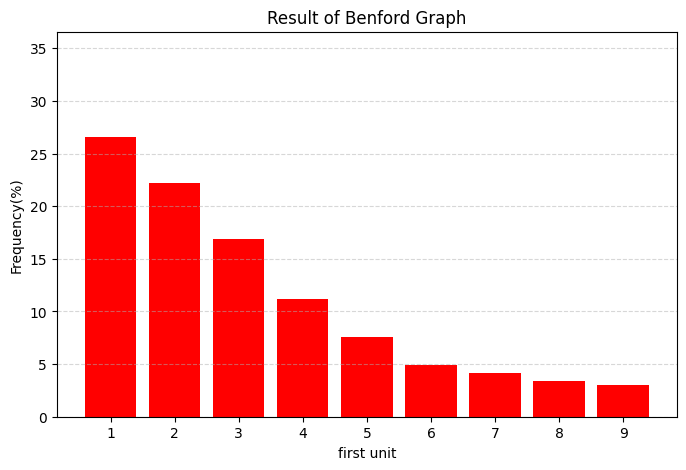

In [ ]:
labels = []
values = []

with open("benford_result.txt", "r") as f:
    for line in f:
        digit, percent = line.strip().split()
        labels.append(digit)
        values.append(float(percent))

plt.figure(figsize=(8,5))
plt.bar(labels, values, color='red')
plt.title("Result of Benford Graph")
plt.xlabel("first unit")
plt.ylabel("Frequency(%)")
plt.ylim(0, max(values) + 10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()